
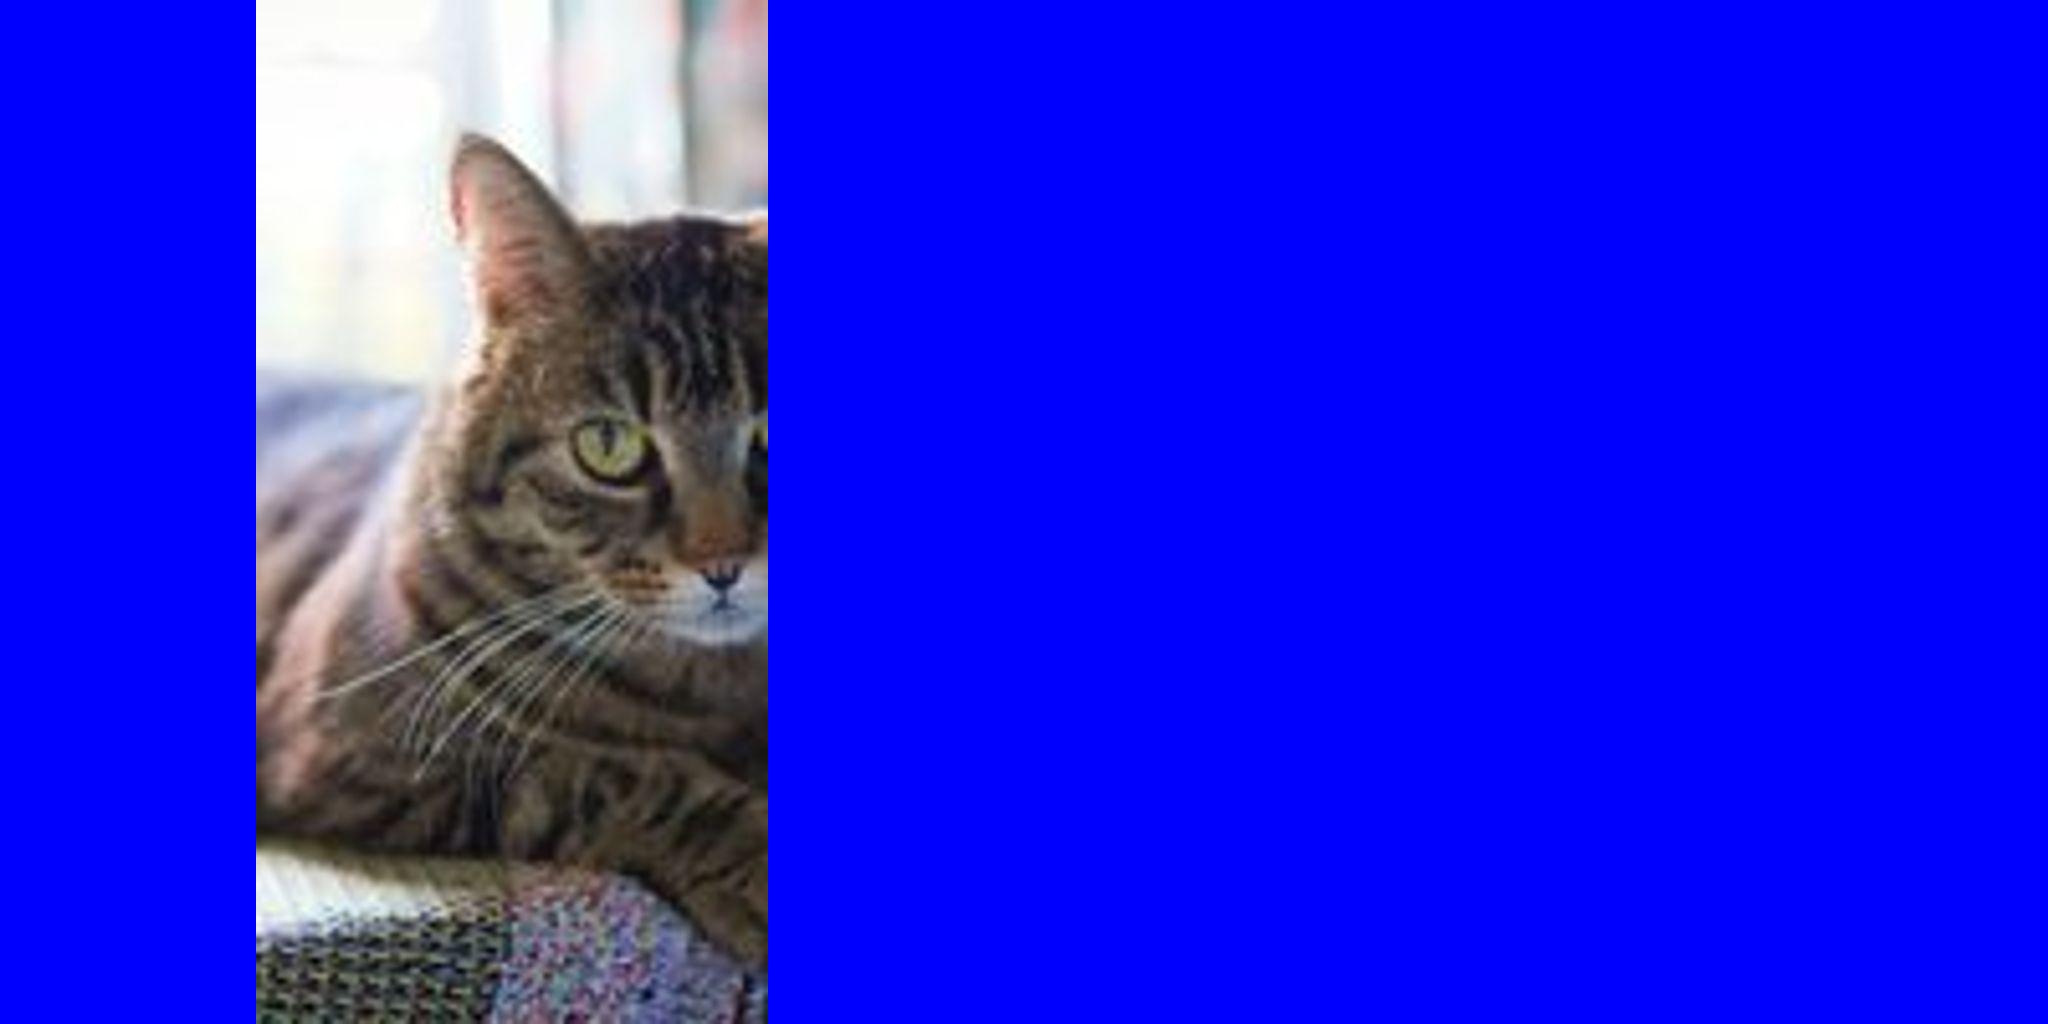

In [ ]:
import sharp from "sharp";
import * as tslab from "tslab";

 const PAGE_WIDTH = 1024;
  const PAGE_HEIGHT = 1024;
  const SPREAD_WIDTH = PAGE_WIDTH * 2;
  const SPREAD_HEIGHT = PAGE_HEIGHT;

  const spread = await sharp({
    create: {
      width: SPREAD_WIDTH,
      height: SPREAD_HEIGHT,
      channels: 4,
      background: "blue",
    },
  })
    .png()
    .toBuffer();

  // Load and resize the source image while maintaining aspect ratio
  const sourceImage = await sharp("100x200.jpg")
    .resize({
      width: PAGE_WIDTH,
      height: PAGE_HEIGHT,
      fit: "inside",
    })
    .toBuffer();

  // Get the resized image dimensions
  const resizedMetadata = await sharp(sourceImage).metadata();
  const { width: resizedWidth, height: resizedHeight } = resizedMetadata;

  // Calculate position for center of left page
  const leftPageCenter = {
    left: Math.floor(PAGE_WIDTH / 2 - resizedWidth / 2),
    top: Math.floor(PAGE_HEIGHT / 2 - resizedHeight / 2),
  };

  // Composite the image onto the spread
  const result = await sharp(spread)
    .composite([
      {
        input: sourceImage,
        left: leftPageCenter.left,
        top: leftPageCenter.top,
      },
    ])
    .toBuffer();

tslab.display.html(`<img src="data:image/jpeg;base64,${result.toString('base64')}" />`);
